In [6]:
#Load the librarys
import pandas as pd #To work with dataset
import numpy as np #Math library
import seaborn as sns #Graph library that use matplot in background
import matplotlib.pyplot as plt #to plot some parameters in seaborn

#Importing the data
df_credit = pd.read_csv("german_credit_data.csv",index_col=0)

#### load data

In [7]:
#Searching for Missings,type of data and also known the shape of data
print(df_credit.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 85.9+ KB
None


### Three fairness measures 


In [77]:
#seperate age group
interval = (18, 25, 35, 60, 120)

cats = ['Student', 'Young', 'Adult', 'Senior']
df_credit["Age_cat"] = pd.cut(df_credit.Age, interval, labels=cats)

df_credit.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,Age_cat
0,67,male,2,own,NaN,little,1169,6,radio/TV,good,Senior
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad,Student
2,49,male,1,own,little,NaN,2096,12,education,good,Adult
3,45,male,2,free,little,little,7882,42,furniture/equipment,good,Adult
4,53,male,2,free,little,little,4870,24,car,bad,Adult


#### 2. group fainess

##### 2.1 evaluate fairness between different age groups

In [71]:
def get_age_acceptance_rate(df_credit):
    df_good = df_credit.loc[df_credit["Risk"] == 'good'].groupby('Age_cat').count()
    df_good['Risk']
    df_bad = df_credit.loc[df_credit["Risk"] == 'bad'].groupby('Age_cat').count()
    df_bad['Risk']
    age_acceptance_rate = df_good['Risk']/(df_bad['Risk']+df_good['Risk'])
    return age_acceptance_rate

age_acceptance_rate = get_age_acceptance_rate(df_credit)

between different age group, the acceptance ratio varies a lot. Seniors have the highest acceptance rate.

/Users/cc/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/cc/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


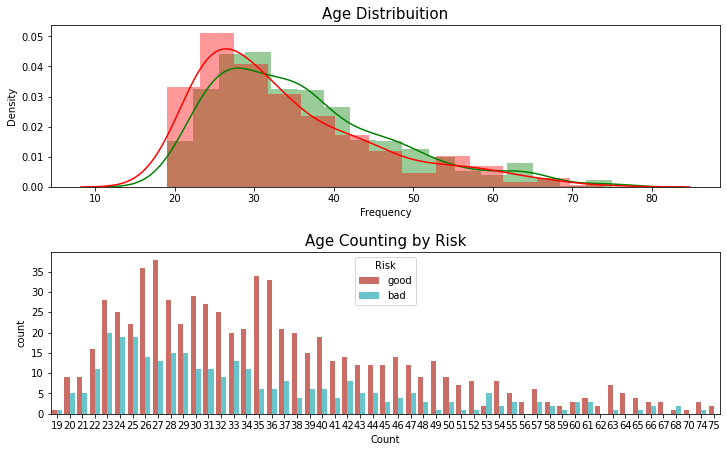

In [10]:
df_good = df_credit[df_credit["Risk"] == 'good']
df_bad = df_credit[df_credit["Risk"] == 'bad']

fig, ax = plt.subplots(nrows=2, figsize=(12,8))
plt.subplots_adjust(hspace = 0.4, top = 0.8)

g1 = sns.distplot(df_good["Age"], ax=ax[0], 
             color="g")
g1 = sns.distplot(df_bad["Age"], ax=ax[0], 
             color='r')
g1.set_title("Age Distribuition", fontsize=15)
g1.set_xlabel("Age")
g1.set_xlabel("Frequency")

g2 = sns.countplot(x="Age",data=df_credit, 
              palette="hls", ax=ax[1], 
              hue = "Risk")
g2.set_title("Age Counting by Risk", fontsize=15)
g2.set_xlabel("Age")
g2.set_xlabel("Count")
plt.show()

In [12]:
# it's a library that we work with plotly
import plotly.offline as py 
py.init_notebook_mode(connected=True) # this code, allow us to work with offline plotly version
import plotly.graph_objs as go # it's like "plt" of matplot
import plotly.tools as tls # It's useful to we get some tools of plotly
import warnings # This library will be used to ignore some warnings
from collections import Counter # To do counter of some features

##### 2.2 evaluate fairness between different sex groups

In [72]:
#First plot
trace0 = go.Bar(
    x = df_credit[df_credit["Risk"]== 'good']["Sex"].value_counts().index.values,
    y = df_credit[df_credit["Risk"]== 'good']["Sex"].value_counts().values,
    name='Good credit'
)

#First plot 2
trace1 = go.Bar(
    x = df_credit[df_credit["Risk"]== 'bad']["Sex"].value_counts().index.values,
    y = df_credit[df_credit["Risk"]== 'bad']["Sex"].value_counts().values,
    name="Bad Credit"
)

#Second plot
trace2 = go.Box(
    x = df_credit[df_credit["Risk"]== 'good']["Sex"],
    y = df_credit[df_credit["Risk"]== 'good']["Credit amount"],
    name=trace0.name
)

#Second plot 2
trace3 = go.Box(
    x = df_credit[df_credit["Risk"]== 'bad']["Sex"],
    y = df_credit[df_credit["Risk"]== 'bad']["Credit amount"],
    name=trace1.name
)

data = [trace0, trace1, trace2,trace3]


fig = tls.make_subplots(rows=1, cols=2, 
                        subplot_titles=('Sex Count', 'Credit Amount by Sex'))

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig.append_trace(trace3, 1, 2)

fig['layout'].update(height=400, width=800, title='Sex Distribuition', boxmode='group')
py.iplot(fig, filename='sex-subplot')

/Users/cc/opt/anaconda3/lib/python3.9/site-packages/plotly/tools.py:461: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [73]:
def get_sex_acceptance_rate(df_credit):
    y1 = df_credit[df_credit["Risk"]== 'good']["Sex"].value_counts()
    y2 = df_credit[df_credit["Risk"]== 'bad']["Sex"].value_counts()
    sex_acceptance_rate =y1/(y1+y2)
    return sex_acceptance_rate
    
sex_acceptance_rate = get_sex_acceptance_rate(df_credit)
sex_acceptance_rate

male      0.723188
female    0.648387
Name: Sex, dtype: float64

#### 1. Anti classifications

In [107]:
#df_sex_test is the original data
#df_sex_test1 is the the data which changed its sex
df_sex_test = df_credit.groupby('Sex').head(100).reset_index(drop=True)
df_sex_test = df_sex_test.sort_values(by=['Sex']).reset_index(drop=True)

df_sex_test1 =df_sex_test.copy()
df_sex_test1['Sex'] = df_sex_test1['Sex'].apply(lambda x: 'male' if x == 'female' else 'female')

In [109]:
#df_age_test is the original data
#df_age_test1 is the the data which changed its age

df_age_test = df_credit.groupby('Age_cat').head(80).reset_index(drop=True)
df_age_test = df_age_test.sort_values(by=['Age']).reset_index(drop=True)

df_age_test1 =df_age_test.copy()
def changeAgeCategory(age_cat):
    if age_cat == 'Student':
        return 'Young'
    if age_cat =='Young':
        return'Adult'
    if age_cat =="Adult":
        return 'Senior'
    if age_cat=='Senior':
        return 'Student'

df_age_test1['Age_cat'] = df_age_test1['Age_cat'].apply(changeAgeCategory)
df_age_test1

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,Age_cat
0,19,female,1,rent,rich,moderate,983,12,furniture/equipment,good,Young
1,20,female,2,own,little,moderate,1967,24,radio/TV,good,Young
2,20,male,2,own,moderate,little,674,12,radio/TV,bad,Young
3,20,female,2,rent,little,little,1282,12,furniture/equipment,bad,Young
4,20,female,2,own,rich,moderate,1577,11,furniture/equipment,good,Young
...,...,...,...,...,...,...,...,...,...,...,...
280,74,male,0,own,little,rich,1299,6,car,good,Student
281,74,male,3,own,little,NaN,4526,24,business,good,Student
282,74,female,3,free,little,moderate,5129,9,car,bad,Student
283,75,female,3,own,NaN,little,1374,6,car,good,Student


In [76]:
# to make predictions based on test data , and test1 data and to see if there's any change

#check the precision afterwords



# if it is different, we shall compare the acceptance rate of each group.
sex_rate_original = get_sex_acceptance_rate(df_sex_test)
sex_rate_new = get_sex_acceptance_rate(df_sex_test1)

age_rate_original =get_age_acceptance_rate(df_age_test)
age_rate_new = get_age_acceptance_rate(df_age_test1)
print(sex_rate_original,sex_rate_new,age_rate_original,age_rate_new)

female    0.4
male      0.8
Name: Sex, dtype: float64 female    0.8
male      0.4
Name: Sex, dtype: float64 Age_cat
Student    0.250000
Young      1.000000
Adult      0.666667
Senior     1.000000
Name: Risk, dtype: float64 Age_cat
Student    0.250000
Young      1.000000
Adult      0.666667
Senior     1.000000
Name: Risk, dtype: float64


#### 3. Calculate FP and FN 

#seperate user group of

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
>>> y_true = ["cat", "ant", "cat", "cat", "ant", "bird"]
>>> y_pred = ["ant", "ant", "cat", "cat", "ant", "cat"]
>>> confusion_matrix(y_true, y_pred, labels=["ant", "bird", "cat"])
array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]])

In the binary case, we can extract true positives, etc as follows:

>>>
>>> tn, fp, fn, tp = confusion_matrix([0, 1, 0, 1], [1, 1, 1, 0]).ravel()
>>> (tn, fp, fn, tp)
(0, 2, 1, 1)